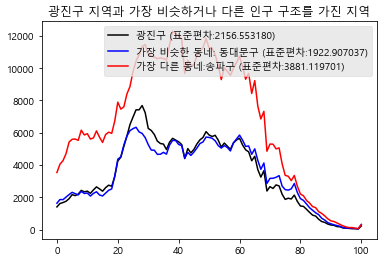

In [1]:
# 실습문제

import csv
import matplotlib.pyplot as plt
import numpy as np

f = open('population.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)
header = next(data)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('광진구 지역과 가장 비슷하거나 다른 인구 구조를 가진 지역')
plt.style.use('ggplot')
gwang = []
note = []
for row in data:
    for i in range(3, len(row)):
        row[i] = int(row[i].replace(',',''))
    if '광진구' in row[0]:
        gwang = row
        where = row[0].split(' ')[1]
        std = np.std(gwang[3:])
        continue
    note.append(row)
plt.plot(gwang[3:], color='black', label='{0:s} (표준편차:{1:f})'.format(where, std))
total=0
for row in note:
    for i in range(3, len(row)):
        total += int(np.square(row[i]-gwang[i]))
    row.append(total)
    total=0
for row in note:
    for i in range(note.index(row)+1, len(note)):
        if(note[note.index(row)][-1]>note[i][-1]):
            for n in range(len(row)):
                note[i][n] , note[note.index(row)][n] = note[note.index(row)][n], note[i][n]
note[0].pop()
simil = note[0]
where = simil[0].split(' ')[1]
std = np.std(simil[3:])
plt.plot(simil[3:], color='blue', label='가장 비슷한 동네: {0:s} (표준편차:{1:f})'.format(where, std))
note[-1].pop()
diff = note[-1]
where = diff[0].split(' ')[1]
std = np.std(diff[3:])
plt.plot(diff[3:], color='red', label='가장 다른 동네:{0:s} (표준편차:{1:f})'.format(where, std))
plt.legend()
plt.show()
plt.close()